In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data=pd.read_csv('pokemon.csv')

In [3]:
data=data.drop(['#'],axis=1)

In [4]:
print('data')
data

data


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
print('Mathematical statistics of all columns')
data.describe()

Mathematical statistics of all columns


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
print('No of each type as their primary type')
print(data['Type 1'].value_counts())
print('Pokemons with secondary type')
print(data['Type 2'].value_counts())

No of each type as their primary type
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
Pokemons with secondary type
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


In [8]:
a=(data['Legendary']!=0).sum()
print("The total number of legendary pokemons combing all gens is",a)

The total number of legendary pokemons combing all gens is 65


In [9]:
print('The pokemon types are',data['Type 1'].unique())
print('The number of unique types are',data['Type 1'].nunique())

The pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [10]:
print('The number of pokemons with 2 types are',(data['Type 2']).count())

The number of pokemons with 2 types are 414


In [11]:
print('Strongest in different types')
strong=data.sort_values('Total', ascending=False)
strong.drop_duplicates(subset=['Type 1'],keep='first')

Strongest in different types


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
545,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
792,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True


Bar graph on No of Pokemons in each gen


Text(0.5, 0, 'Generations')

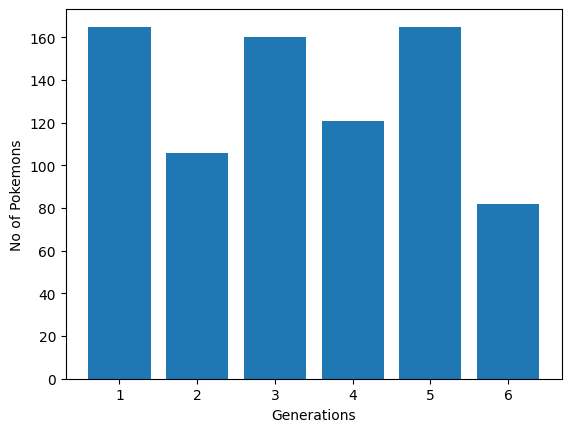

In [12]:
#NoOfPoke=np.array([data[data.Generation==1],data[data.Generation==2],data[data.Generation==3],data[data.Generation==4],data[data.Generation==5],data[data.Generation==6]])
print('Bar graph on No of Pokemons in each gen')
NoOfPoke=np.array([165,106,160,121,165,82])
NoOfGen=np.array([1,2,3,4,5,6])
plt.bar(NoOfGen,NoOfPoke)
plt.ylabel("No of Pokemons")
plt.xlabel("Generations")

Line Graph on entire data set


<Axes: >

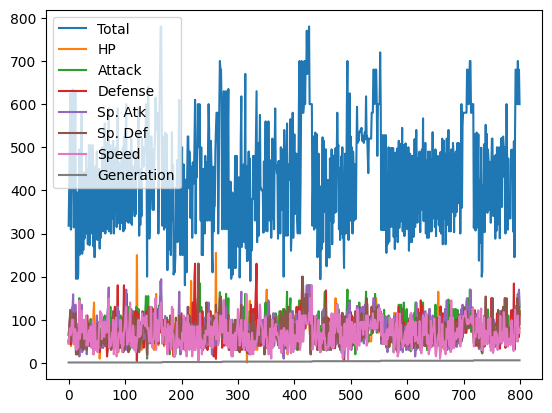

In [13]:
print('Line Graph on entire data set')
data.plot()

No of pokemons with type1


<Axes: >

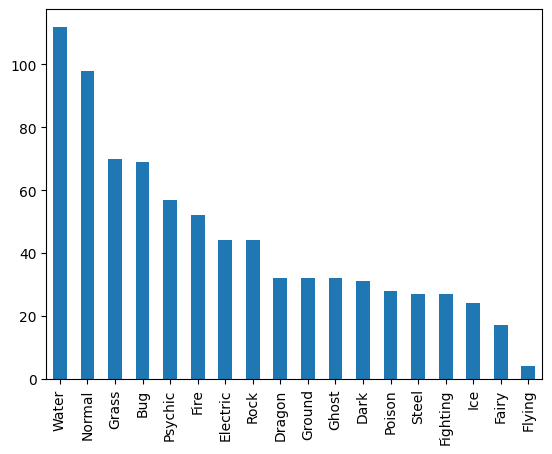

In [14]:
print('No of pokemons with type1')
data['Type 1'].value_counts().plot(kind='bar')
#data['Type 2'].value_counts().plot(kind='bar');

No of pokemons with type2


<Axes: >

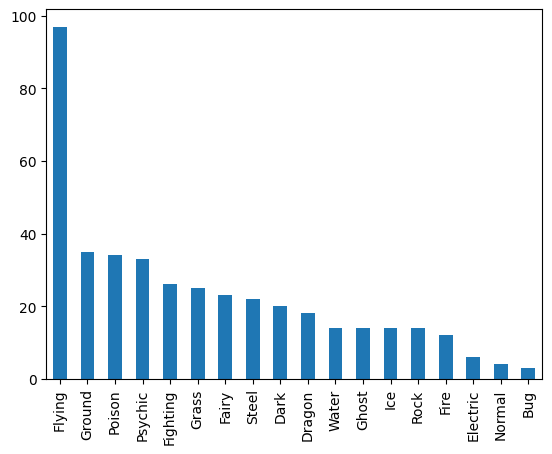

In [15]:
print('No of pokemons with type2')
data['Type 2'].value_counts().plot(kind='bar')

The perfect rivarly(Fire vs water)


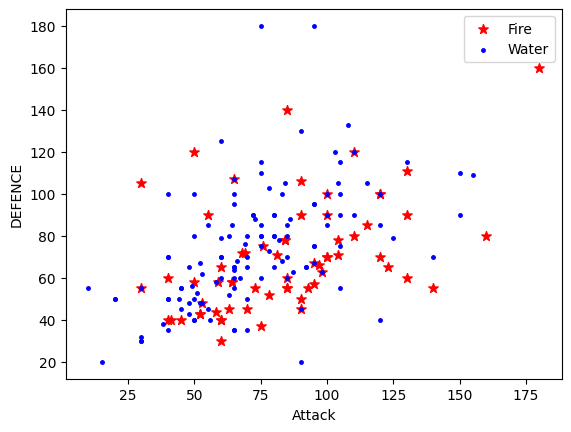

In [16]:
print('The perfect rivarly(Fire vs water)')
fire=data[(data['Type 1']=='Fire') | ((data['Type 2'])=="Fire")]
water=data[(data['Type 1']=='Water') | ((data['Type 2'])=="Water")]
fire
plt.scatter(fire.Attack,fire.Defense,c='r',label='Fire',marker="*",s=50)
plt.scatter(water.Attack,water.Defense,c='b',label="Water",marker=".",s=25)
plt.xlabel("Attack")
plt.ylabel("DEFENCE")
plt.legend()

A pie chart to represent no of pokemon of each type1


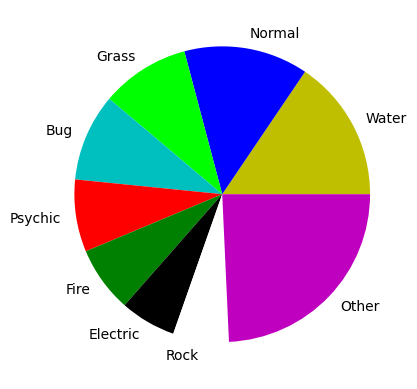

In [17]:
print('A pie chart to represent no of pokemon of each type1')
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['y', 'b', '#00ff00', 'c', 'r', 'g', 'k', 'w', 'm']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes,explode,labels,colors)
plt.show()

A box plot on entire data set of each column


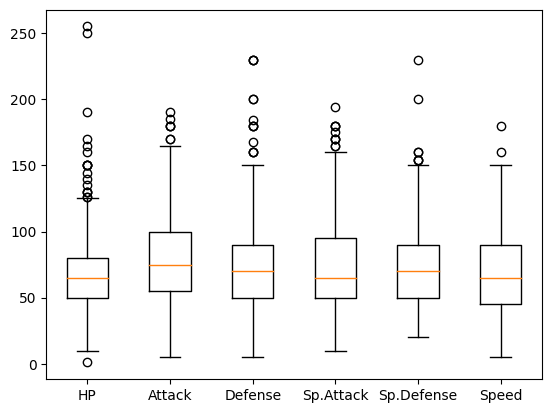

In [18]:
print('A box plot on entire data set of each column')
labels='HP','Attack','Defense','Sp.Attack','Sp.Defense','Speed'
data2=data.drop(['Generation','Total','Name','Type 1','Type 2','Legendary'],axis=1)
plt.boxplot(data2,labels=labels)
plt.show()

A violin plot on Type1 vs attack


<Axes: xlabel='Type 1', ylabel='Attack'>

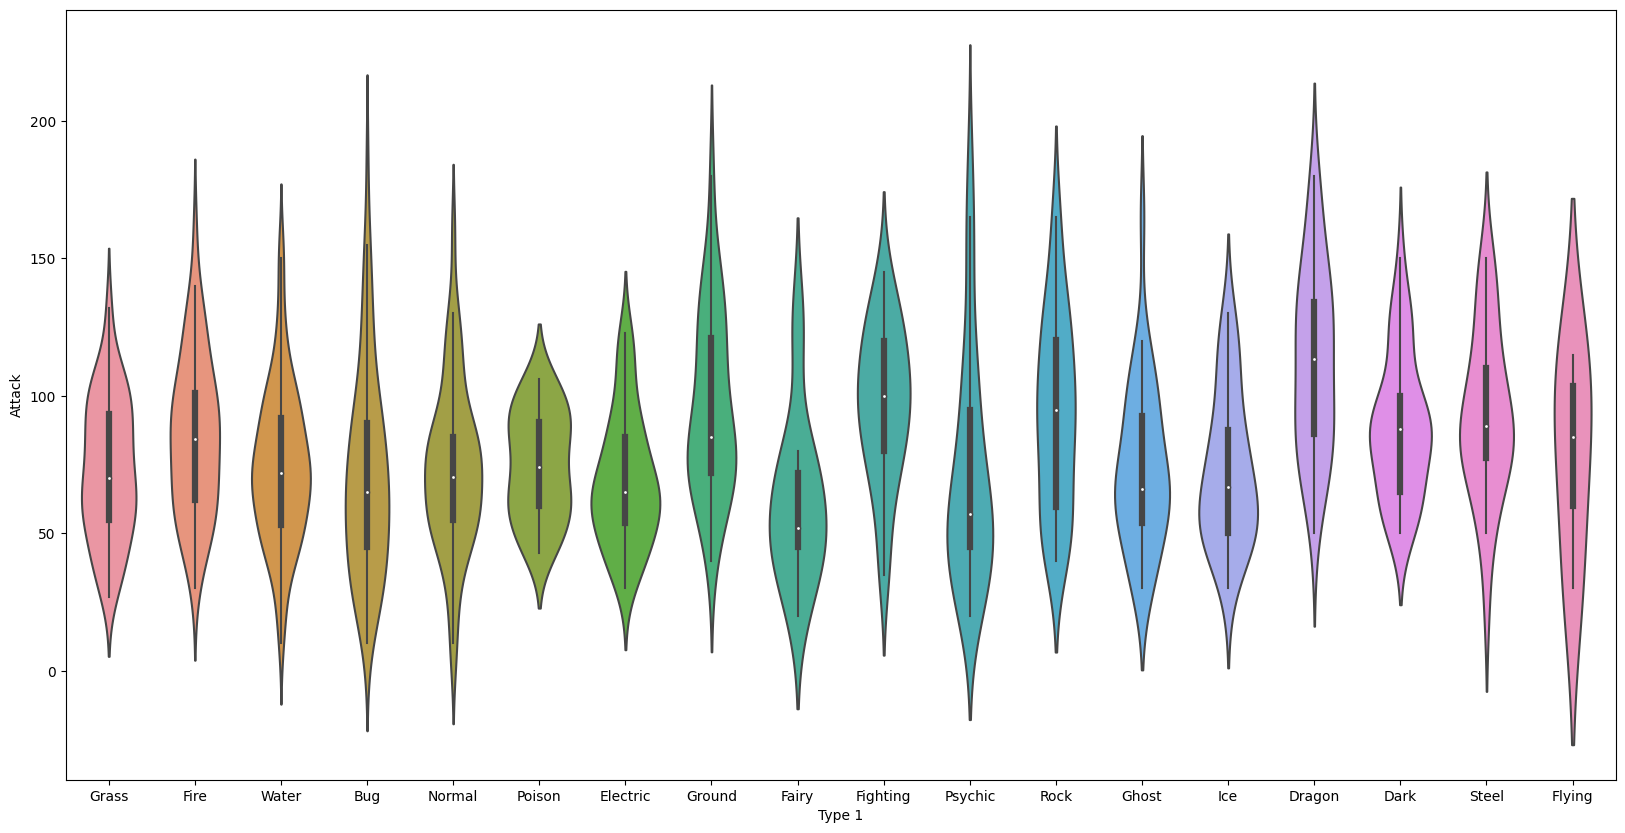

In [19]:
print('A violin plot on Type1 vs attack')
plt.subplots(figsize = (20,10))
sns.violinplot(x = "Type 1", y = "Attack",data = data)

A violin plot on strongest pokemon in each gen based on total


<Axes: xlabel='Generation', ylabel='Total'>

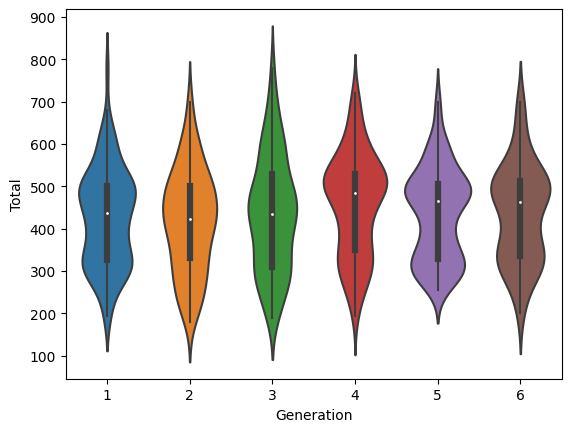

In [20]:
print('A violin plot on strongest pokemon in each gen based on total')
sns.violinplot(x = "Generation", y = "Total",data = data)

In [21]:
print('A tabular rep of no of each type of Pokemon in each gen')
a=data.groupby(['Generation','Type 1']).count().reset_index()
a
a=a[['Type 1','Name','Generation']]
a.pivot(index='Generation',columns='Type 1',values='Name')

A tabular rep of no of each type of Pokemon in each gen


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,14.0,NaN,3.0,9.0,2.0,7.0,14.0,NaN,4.0,13.0,8.0,2.0,24.0,14.0,11.0,10.0,NaN,31.0
2,12.0,6.0,NaN,7.0,5.0,2.0,8.0,NaN,1.0,9.0,3.0,4.0,15.0,1.0,7.0,5.0,3.0,18.0
3,12.0,6.0,12.0,5.0,NaN,5.0,8.0,NaN,5.0,13.0,7.0,7.0,18.0,3.0,12.0,8.0,12.0,27.0
4,10.0,3.0,4.0,12.0,1.0,3.0,5.0,NaN,7.0,15.0,4.0,3.0,18.0,6.0,8.0,6.0,3.0,13.0
5,18.0,13.0,9.0,8.0,NaN,7.0,9.0,2.0,5.0,15.0,10.0,6.0,19.0,2.0,14.0,6.0,4.0,18.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,10.0,5.0,NaN,2.0,4.0,2.0,5.0,9.0,5.0,5.0


In [22]:
b=data.groupby(['Generation','Type 2']).count().reset_index()
b
b=b[['Type 2','Name','Generation']]
b.pivot(index='Generation',columns='Type 2',values='Name')

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,NaN,1.0,1.0,NaN,3.0,2.0,NaN,23.0,NaN,2.0,6.0,3.0,NaN,22.0,7.0,2.0,2.0,4.0
2,NaN,2.0,2.0,2.0,3.0,2.0,3.0,19.0,NaN,1.0,8.0,1.0,NaN,3.0,3.0,3.0,3.0,NaN
3,2.0,7.0,3.0,NaN,8.0,4.0,1.0,14.0,3.0,5.0,9.0,NaN,NaN,2.0,16.0,4.0,NaN,4.0
4,1.0,4.0,4.0,NaN,1.0,7.0,1.0,16.0,2.0,2.0,8.0,5.0,NaN,2.0,2.0,1.0,9.0,2.0
5,NaN,3.0,3.0,4.0,3.0,10.0,7.0,19.0,4.0,5.0,2.0,3.0,NaN,5.0,2.0,4.0,8.0,NaN
6,NaN,3.0,5.0,NaN,5.0,1.0,NaN,6.0,5.0,10.0,2.0,2.0,4.0,NaN,3.0,NaN,NaN,4.0
